# Lab 3: Introduction to Optimisation

The purpose of this lab session is to introduce you to the main optimisation notions and let you build your first optimisation programs. Recall that in the last lecture we discussed an example with a brewery that produced two types of beel, ale and lager, and our goal was to decide, given the available ingredients and the profit margin, how many barrels to produce (and whether these are ale or lager) 

## 1. Our motivating example

Let us start by revisiting the example; see also slides 58-63 in file **CF969 - 1 - Intro** in Unit 1. 

A barrel of ale requires 5 pounds of corn, 4 ounces of hops and 35 pounds of malt. Similarly, a barrel of lager requires 15 pounds of corn, 4 ounces of hops and 20 pounds of malt. Each barel of ale returns a profit of £13, while each barel of lager returns a profit of £23. Finally, our ingredients are restricted in quantity. We have 480 pounds of corn, 160 ounces of hops and 1190 pounds of malt.

The following table summarises:

| Beverage | Corn (lb) | Hops (oz) | Malt (lb) | Profit (£) |
| --- | --- | --- | --- | --- |
| Ale (barrel) | 5 | 4 | 35 | 13 |
| Lager (barrel) | 15 | 4  | 20  | 23 |
| Quantity | 480 | 160 | 1190 | |

Recall what was our first step. We turned the **constraints** into equations involving **variables**. In particular, we used $A$ to denote the number of barrels of ale and $B$ denote the number of barrels of lager. Remember: our goal is to maximise our profit. This gave rise to the equations below. The top line is our **objective function** while the remaining lines correspond to **constraints**. The entire *program* is what we call a **linear program**. 

Note that both the objective function and all constraints are *linear*, that is, each variable ($A$ or $B$) appear with an exponent of $1$. For example, the objective function $\max_{A,B}{13A^2+23B}$ would not be linear ($A$ is raised to the power of $2$), while a constraint such as $A\cdot B\leq 100$ would not be linear as the term $A\cdot B$ involves multiplying two variables and is, hence, raised again to a power other than $1$.

\begin{eqnarray*}
\max_{A,B} & \hspace{1cm}&13A+23B \hspace{1cm} &\text{%This is simply the profit equation}\\
\text{subject to} & \hspace{1cm}&5A+15B &\leq 480 &\hspace{1cm} \text{%Corn constraint}\\
& \hspace{1cm}&4A+4B &\leq 160 &\hspace{1cm} \text{%Hops constraint}\\
& \hspace{1cm}&35A+20B &\leq 1190 &\hspace{1cm} \text{%Malt constraint}\\
& \hspace{1cm}&A, B &\geq 0 &\hspace{1cm} \text{%Our barrels must be non-negative numbers}
\end{eqnarray*}

Note that this formulation allows for *fractional* barrels, that is, we do **not** restrict $A$ and $B$ to be **integers**.

If you attended Lecture 2, you might remember that the **optimal** solution was to produce 12 barrels of ale and 28 barrels of lager, giving a profit of £800. I demonstrated why this is the optimal solution, by arguing about the **space of feasible solutions**, that is, about the possible solutions that satisfy all constraints, and then I explained why the solution $(A=12, B=28)$ is the best.

*Question:* How would you do that in the computer? How would you implement such a set of constraints and get back the optimal solution?

*Response*: There are of course several ways to do that. Today, we will focus on using functions offered by Python and in particular **linprog**. In particular, check the file *scipy.optimize.linprog — SciPy v1.10.0 Manual.pdf* that is on the CF969 moodle page -- see Unit 2 and folder lab3-files.

**Task 1**: Read the pdf file carefully. Do you understand what is the purpose of the function **linprog**?

**Task 2**: Can you write a short program that verifies that the solution for our motivating example is indeed $(A=12, B=28)$?

In [2]:
# %load ./sol1.py
c = [-13, -23]
A = [[5, 15], [4, 4], [35, 20]]
b = [480, 160, 1190]
from scipy.optimize import linprog
res = linprog(c, A_ub = A, b_ub=b, bounds = [0, None])
print(res)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -800.0
              x: [ 1.200e+01  2.800e+01]
            nit: 3
          lower:  residual: [ 1.200e+01  2.800e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  2.100e+02]
                 marginals: [-1.000e+00 -2.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


How to interpret the result you obtained? It is clear to you?

## 2. A second example

The following is the example from the **linprog** manual. 


\begin{eqnarray*}
\min_{x_0, x_1} & \hspace{1cm}&-x_0+4x_1 \\
\text{subject to} & \hspace{1cm}&-3x_0+x_1\leq 6\\
& \hspace{1cm}&-x_0-2x_1 \geq -4\\
& \hspace{1cm}&x_1\geq -3
\end{eqnarray*}

Observe that the problem is not presented in the form accepted by linprog. This is easily fixed by converting the “greater than” inequality constraint to a “less than” inequality constraint by multiplying both sides by a factor of $-1$. Note also that the last constraint is really the simple bound $-3 \leq x_1 \leq \infty$. Finally, since there are no bounds on $x_0$, we must explicitly specify the bounds $-\infty \leq x_0 \leq \infty$, as the default is for variables to be non-negative. 

In [3]:
c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds))

In [4]:
print(res)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -22.0
              x: [ 1.000e+01 -3.000e+00]
            nit: 0
          lower:  residual: [       inf  0.000e+00]
                 marginals: [ 0.000e+00  6.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.900e+01  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


What does the output message mean? What is *fun*? What is *slack*? What is *x*? Some of these might be easy to guess, some of these we will discuss in the lectures.

The following will depend on the version of linprog and python installed. We might observe that some of the numbers involved *look* like integer values, although they are not exactly integers (see for example the value of  *fun*). Let's try the following.

In [11]:
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds), method='highs')
print(res)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -22.0
              x: [ 1.000e+01 -3.000e+00]
            nit: 0
          lower:  residual: [       inf  0.000e+00]
                 marginals: [ 0.000e+00  6.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.900e+01  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


## 3. Can we always solve linear programs?

In the lecture, we discussed that it might happen that there is no solution (that is, the program is *infeasible*), or that the objective function is *unbounded*. 

**Task 3:** Write a 2-variable linear program that is infeasible. Also, write a 2-variable linear program that is unbounded. Let me know if you want me to check your solution.

**Task 4:** Draw the feasible region of the following 2-variable linear program.
\begin{eqnarray*}
\max_{x_1,x_2} & \hspace{1cm}&2x_1-x_2 \hspace{1cm} &\\
\text{subject to} & \hspace{1cm}&x_1+x_2 &\geq 1 &\hspace{1cm}\\
& \hspace{1cm}&x_1-x_2 &\leq 0 &\hspace{1cm}\\
& \hspace{1cm}&3x_1+x_2 &\leq 6 &\hspace{1cm} \\
& \hspace{1cm}&x_1, x_2 &\geq 0 &\hspace{1cm} 
\end{eqnarray*}

Determine the optimal solution to this problem by inspection.
    
    

Text(0, 0.5, '$x_2$')

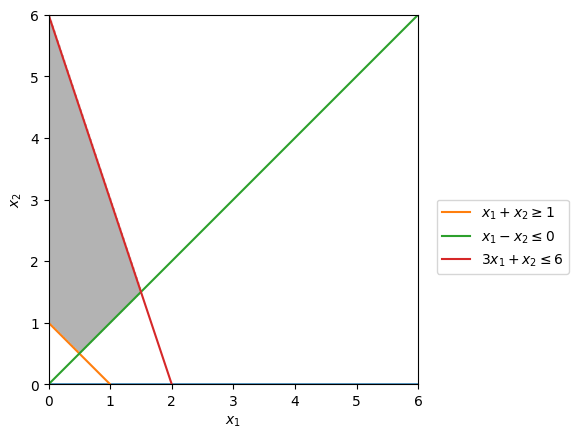

In [34]:
# %load ./sol2.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plot the feasible region
d = np.linspace(-2,6,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=0) & (x>=0) & (y>=1-x) & (y>=x) & (y<=6-3*x)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(0, 6, 2000)
# x2 >= 0
y1 = (x*0)+0 
# x1+x2 >=1 
y2 = 1-x
# x1-x2<=0 
y3 = x
# 3x1+x2 <= 6 
y4 = 6-3 * x


# Make plot
plt.plot(x, 0*np.ones_like(y1))
plt.plot(x, y2, label=r'$x_1+x_2\geq 1$')
plt.plot(x, y3, label=r'$x_1-x_2 \leq 0$')
plt.plot(x, y4, label=r'$3x_1+x_2 \leq 6$')
plt.xlim(0,6)
plt.ylim(0,6)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

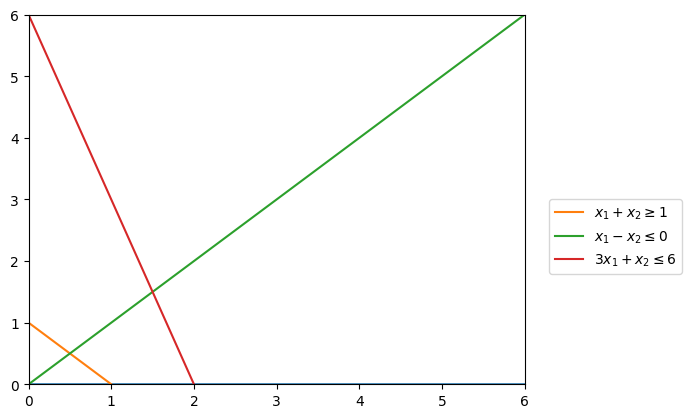

In [35]:

plt.plot(x, 0*np.ones_like(y1))
plt.plot(x, y2, label=r'$x_1+x_2\geq 1$')
plt.plot(x, y3, label=r'$x_1-x_2 \leq 0$')
plt.plot(x, y4, label=r'$3x_1+x_2 \leq 6$')
plt.xlim(0,6)
plt.ylim(0,6)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)

## 4. Exercises on solving linear programs

**Task 5:** A company will face the following cash requirements in the next eight quarters (positive entries
represent cash needs while negative entries represent cash surpluses). 

| Q1 | Q2 | Q3 | Q4 | Q5 | Q6 | Q7 | Q8 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 100 | 500 | 100 | -600 | -500 | 200 | 600 | -900 |

The company has three borrowing possibilities.
<ul>
<li> a 2-year loan available at the beginning of Q1, with a 1% interest per quarter.
<li> The other two borrowing opportunities are available at the beginning of every quarter: a 6-
month loan with a 1.8% interest per quarter, and a quarterly loan with a 2.5% interest for the
quarter.
</ul>
    
Any surplus can be invested at a 0.5% interest per quarter. Formulate a linear program that maximises
the wealth of the company at the beginning of Q9. Solve the problem using **linprog** and interpret the
solution.

**Hints:** There as some modelling decisions to make here. To begin with, *what are the variables?* To answer that, consider the financing tools at our disposal. Then, *how do our constraints look like?* The table above (cash requirements for 8 quarters) indicate that we have eight non-trivial constraints. Finally, *what is the objective function?*

**Solution**: Please see below for the solution and check file 'How to build the model' in the lab3-files folder.

In [40]:
# %load ./sol3.py
import numpy as np
from scipy.optimize import linprog

# I generate the vector of coefficients in the objective function and initialize the matrix of contraint coefficients
c = np.concatenate([np.zeros(21), [-1]]) # Recall that linprog has a minimization objective, so we minimize -wealth
A = np.zeros((8,22))

# I create a row for each constraint
A[0] = np.concatenate([[1,1,1,-1],np.zeros(18)])
A[1] = np.concatenate([[-0.01, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(15)])
A[2] = np.concatenate([[-0.01, -1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(12)])
A[3] = np.concatenate([[-0.01, 0, 0, 0, -1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(9)])
A[4] = np.concatenate([[-0.01], np.zeros(6), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(6)])
A[5] = np.concatenate([[-0.01], np.zeros(9), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, 1, -1],np.zeros(3)])
A[6] = np.concatenate([[-0.01], np.zeros(12), [-1.018, 0, 0, -0.018, -1.025, 1.005, 1, -1, 0]])
A[7] = np.concatenate([[-1.01], np.zeros(15), [-1.018, 0, 0, -1.025, 1.005, -1]])

b = [100, 500, 100, -600, -500, 200, 600, -900]

# It is now time to solve. All variables are constrained to be non-negative, so I don't need to specify the bounds; this is the default
res = linprog(c, A_eq=A, b_eq=b, method='revised simplex', options={"disp": True})

# Print the solution. Recall that the wealth is the last variable. 
res.x

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         NA                  1131.370849898      -900.0              
1     1         NA                  1084.622736254      -900.0              
1     2         NA                  879.4789725306      -900.0              
1     3         NA                  792.3938429683      -900.0              
1     4         NA                  727.2892907422      -900.0              
1     5         NA                  621.5481973748      -900.0              
1     6         NA                  434.3424603237      -900.0              
1     7         NA                  330.5410934859      -799.0              
1     8         NA                  299.9109874116      -768.5675148382     
1     9         NA                  1.803155319699e-13  -461.1587527412     
2     9         NA                  1.803155319699e-13  -461.1587527412     
2     10        NA                  1.392373714443e-13  -468.7828125949     


/var/folders/t_/4t8_qnxj42v8gqmhh22r_hs80000gn/T/ipykernel_61221/2075135612.py:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_eq=A, b_eq=b, method='revised simplex', options={"disp": True})


array([424.40992891,   0.        ,   0.        , 324.40992891,
       178.21212073,   0.        ,   0.        ,   0.        ,
       107.45191746,   0.        ,   0.        ,   0.        ,
       304.19774641,   0.        ,   0.        , 801.47463585,
         0.        ,   0.        , 601.23790974,   0.        ,
         0.        , 471.3459718 ])

In [39]:
import numpy as np
c = np.concatenate([np.zeros(21), [-1]])
A = np.zeros((8,22))
print("C=",len(c))
print("A = ",A)

C= 22
A =  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Task 6:** Consider a restaurant that is open seven days a week. Based on past experience, the number of workers needed on a particular day is given as follows: 

| Mon | Tue | Wed | Thu | Fri | Sat | Sun | 
| --- | --- | --- | --- | --- | --- | --- |
| 14 | 13 | 15 | 16 | 19 | 18 | 11 |

Every worker works five days in a week and has two days off in the following pattern: three days work, one day off, two days work, one day off. So, there are workers working on Mon-Tue-Wed-Fri-Sat, other workers on Tue-Wed-Thu-Sat-Sun, etc. How can we minimize the number of workers that staff the restaurant? 

**Hint**: Let's begin by following the same approach as above. That is, let's formulate a linear program and then use **linprog** to solve it. See also the file *How to build the model* in the lab3-files folder.

In [3]:
# %load ./sol4a.py
Minimize  x1+x2+x3+x4+x5+x6+x7
Subject to

x1+x3+x4+x5+x7 >= 14 
x1+x2+x4+x5+x6 >= 13 
x2+x3+x5+x6+x7 >= 15 
x1+x3+x4+x6+x7 >= 16 
x1+x2+x4+x5+x7 >= 19 
x1+x2+x3+x5+x6 >= 18 
x2+x3+x4+x6+x7 >= 11 

All  x's should be non-negative integers

After creating the linear program, let's attempt to solve it. 

In [5]:
# %load ./sol4b.py
import numpy as np
from scipy.optimize import linprog

# I generate the vector of coefficients in the objective function 
c = np.array([1,1,1,1,1,1,1])
A = np.zeros((7,7))

# I create a row for each constraint
A[0] = np.array([-1,0,-1,-1,-1,0,-1])
A[1] = np.array([-1,-1,0,-1,-1,-1,0])
A[2] = np.array([0,-1,-1,0,-1,-1,-1])
A[3] = np.array([-1,0,-1,-1,0,-1,-1])
A[4] = np.array([-1,-1,0,-1,-1,0,-1])
A[5] = np.array([-1,-1,-1,0,-1,-1,0])
A[6] = np.array([0,-1,-1,-1,0,-1,-1])
b = np.array([-14, -13, -15, -16, -19, -18, -11])

# It is now time to solve. All variables are constrained to be non-negative, so I don't need to specify the bounds; this is the default
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex', options={"disp": True})

# Print the solution. Recall that the wealth is the last variable. 
res.x

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         -19.0               0.0                 0.0                 
1     1         -15.0               0.0                 13.0                
1     2         -14.0               0.0                 14.0                
1     3         -6.0                0.0                 18.0                
1     4         -6.0                0.0                 18.66666666667      
1     5         -5.0                0.0                 19.0                
1     6         -4.0                0.0                 20.0                
1     7         -2.0                0.0                 22.0                
1     8         0.0                 0.0                 22.66666666667      
2     8         0.0                 0.0                 22.66666666667      
Optimization terminated successfully.
         Current function value: 22.666667   
         Iterations: 8


/var/folders/t_/4t8_qnxj42v8gqmhh22r_hs80000gn/T/ipykernel_98515/3429918675.py:20: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='revised simplex', options={"disp": True})


array([7.66666667, 2.66666667, 3.66666667, 0.        , 4.        ,
       0.        , 4.66666667])

What do you observe? How does the optimal solution (that is, number of workers per day) look like?

## 5. Integer linear programming

The last example demonstrated a drawback of **linprog**. There are settings where we require that our solution is **integral**. For example, we cannot have $3.5$ people in a work shift. In next week's lab we will examine software that does not necessarily involve python. Today, we will examine [PuLP](https://pypi.org/project/PuLP/).

We begin with installing PuLP. The following line might require a kernel restart; this will necessary if you see a message that installation is successful but you get an error message when executing **from pulp import** below.

In [6]:
!pip install PuLP --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 43.2 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


We will first build the model, that is, declare **objective function**, **variables** and **constraints**. We create a variable for each shift and we follow the same reasoning as in the previous linear program that used **linprog**.  

In [1]:
from pulp import *
problem = LpProblem('Shifts', LpMinimize)

x1 = LpVariable('Shift 1', lowBound=0 , cat=LpInteger)
x2 = LpVariable('Shift 2', lowBound=0 , cat=LpInteger)
x3 = LpVariable('Shift 3', lowBound=0 , cat=LpInteger)
x4 = LpVariable('Shift 4', lowBound=0 , cat=LpInteger)
x5 = LpVariable('Shift 5', lowBound=0 , cat=LpInteger)
x6 = LpVariable('Shift 6', lowBound=0 , cat=LpInteger)
x7 = LpVariable('Shift 7', lowBound=0 , cat=LpInteger)

#Objective Function
problem += x1+x2+x3+x4+x5+x6+x7

#Constraints
problem += x1+x3+x4+x5+x7 >= 14
problem += x1+x2+x4+x5+x6 >= 13
problem += x2+x3+x5+x6+x7 >= 15
problem += x1+x3+x4+x6+x7 >= 16
problem += x1+x2+x4+x5+x7 >= 19
problem += x1+x2+x3+x5+x6 >= 18
problem += x2+x3+x4+x6+x7 >= 11

Let's see how our model looks like

In [2]:
problem

Shifts:
MINIMIZE
1*Shift_1 + 1*Shift_2 + 1*Shift_3 + 1*Shift_4 + 1*Shift_5 + 1*Shift_6 + 1*Shift_7 + 0
SUBJECT TO
_C1: Shift_1 + Shift_3 + Shift_4 + Shift_5 + Shift_7 >= 14

_C2: Shift_1 + Shift_2 + Shift_4 + Shift_5 + Shift_6 >= 13

_C3: Shift_2 + Shift_3 + Shift_5 + Shift_6 + Shift_7 >= 15

_C4: Shift_1 + Shift_3 + Shift_4 + Shift_6 + Shift_7 >= 16

_C5: Shift_1 + Shift_2 + Shift_4 + Shift_5 + Shift_7 >= 19

_C6: Shift_1 + Shift_2 + Shift_3 + Shift_5 + Shift_6 >= 18

_C7: Shift_2 + Shift_3 + Shift_4 + Shift_6 + Shift_7 >= 11

VARIABLES
0 <= Shift_1 Integer
0 <= Shift_2 Integer
0 <= Shift_3 Integer
0 <= Shift_4 Integer
0 <= Shift_5 Integer
0 <= Shift_6 Integer
0 <= Shift_7 Integer

Time to solve it and print the solution!

In [3]:
problem.solve()
print("Shift 1:", x1.varValue)
print("Shift 2:", x2.varValue)
print("Shift 3:", x3.varValue)
print("Shift 4:", x4.varValue)
print("Shift 5:", x5.varValue)
print("Shift 6:", x6.varValue)
print("Shift 7:", x7.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/cjs/Library/Python/3.11/lib/python/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/t_/4t8_qnxj42v8gqmhh22r_hs80000gn/T/b49cd47752564722906e68ea1f0dbd8b-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/t_/4t8_qnxj42v8gqmhh22r_hs80000gn/T/b49cd47752564722906e68ea1f0dbd8b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 69 RHS
At line 77 BOUNDS
At line 85 ENDATA
Problem MODEL has 7 rows, 7 columns and 35 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 22.6667 - 0.00 seconds
Cgl0003I 0 fixed, 7 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 7 rows, 7 columns (7 integer (0 of which binary)) and 35 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of 24 found by greedy

To make sure that the solution is valid, we could check that the number of workers per shift satisfy the constraints.

**Task 7:** Solve tasks 5 and 6 using PuLP